In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
match = pd.read_csv("D:\Data Science Data Setss\IPL Dataset and Code\IPL Matches 2008-2020.csv")
ball = pd.read_csv("D:\Data Science Data Setss\IPL Dataset and Code\IPL Ball-by-Ball 2008-2020.csv")

In [8]:
match.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


In [9]:
ball.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [10]:
print(match.shape,ball.shape)

(816, 17) (193468, 18)


In [11]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [12]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [13]:
match['Season'] = pd.to_datetime(match['date']).dt.year

C:\Users\HP\AppData\Local\Temp/ipykernel_8048/2157726245.py:1: UserWarning: Parsing '18-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  match['Season'] = pd.to_datetime(match['date']).dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_8048/2157726245.py:1: UserWarning: Parsing '19-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  match['Season'] = pd.to_datetime(match['date']).dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_8048/2157726245.py:1: UserWarning: Parsing '20-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  match['Season'] = pd.to_datetime(match['date']).dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_8048/2157726245.py:1: UserWarning: Parsing '21-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  match['Season'] = pd.to_datetime(match['

In [14]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [19]:
match_per_season = match.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})

In [20]:
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Match Played in Each Season')

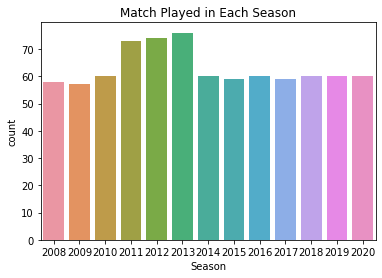

In [22]:
sns.countplot(match['Season']);
plt.title("Match Played in Each Season")

In [23]:
season_data = match[['id','Season']].merge(ball,left_on='id',right_on='id',how='left').drop('id',axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


Text(0.5, 1.0, 'Total Runs in Each Season')

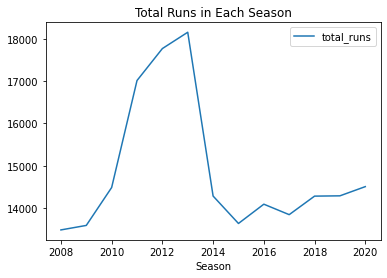

In [37]:
season= season_data.groupby(['Season'])['total_runs'].size().reset_index()
season.set_index('Season').plot()
plt.title("Total Runs in Each Season")

In [38]:
runs_per_season= pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs Scored Per Match'] = runs_per_season['total_runs'] / runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)

In [39]:
runs_per_season

,matches,total_runs,Runs Scored Per Match
Season,,,
2008,58,13489,232.568966
2009,57,13595,238.508772
2010,60,14489,241.483333
2011,73,17013,233.054795
2012,74,17767,240.094595
2013,76,18152,238.842105
2014,60,14288,238.133333
2015,59,13641,231.203390
2016,60,14096,234.933333


In [41]:
toss = match['toss_winner'].value_counts()

In [42]:
toss

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

<AxesSubplot:title={'center':'No. of Tosses won by each team'}, xlabel='toss_winner'>

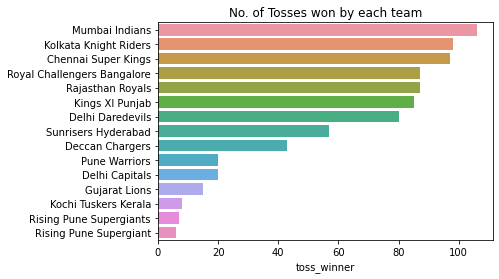

In [44]:
plt.title("No. of Tosses won by each team")
sns.barplot(y=toss.index,x=toss)

<AxesSubplot:title={'center':'Toss Decision Across Seasons'}, xlabel='Season', ylabel='count'>

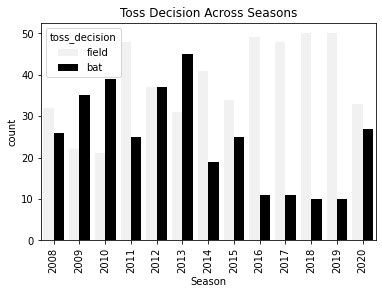

In [53]:
plt.title("Toss Decision Across Seasons")
plt.xticks(rotation=90,fontsize=10)
sns.countplot(x='Season',data=match,hue='toss_decision',color='black')


In [56]:
match['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [58]:
match['venue'][match['result']!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [59]:
match['venue'][match['result']!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [60]:
match['venue'][match.toss_winner=='Kings XI Punjab'][match.winner=='Kings XI Punjab'].mode()

0    Punjab Cricket Association Stadium, Mohali
Name: venue, dtype: object

In [61]:
match['venue'][match.toss_winner=='Mumbai Indians'][match.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [62]:
match.winner[match.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [63]:
match.winner[match.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

In [66]:
toss_match = match['toss_winner']==match['winner']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

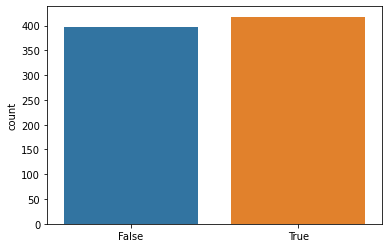

In [70]:
sns.countplot(toss_match)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

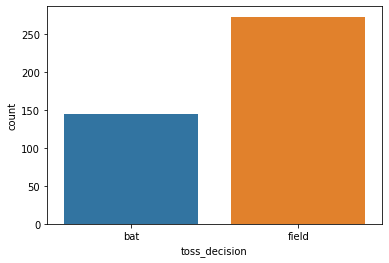

In [71]:
sns.countplot(match['toss_decision'][match.toss_winner==match.winner])


In [73]:
player = (ball['batsman']=='SK Raina')
df_raina = ball[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


Text(0.5, 1.0, 'Dissmal Kind')

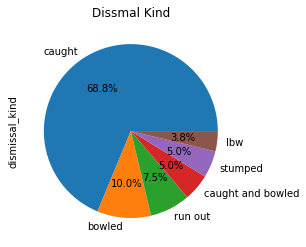

In [76]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Dissmal Kind")

In [98]:
df_raina.sample()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
31756,419125,1,18,2,SK Raina,S Badrinath,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians


<AxesSubplot:xlabel='batsman_runs'>

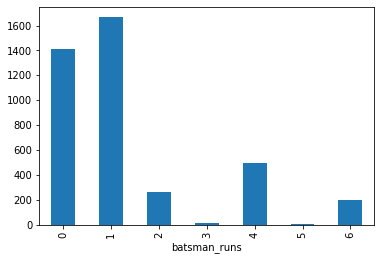

In [104]:
df_raina.groupby('batsman_runs')['total_runs'].count().plot.bar()

In [105]:
df_raina.groupby('batsman_runs')['total_runs'].count()

batsman_runs
0    1412
1    1666
2     264
3      11
4     493
5       1
6     194
Name: total_runs, dtype: int64

In [120]:
ball.groupby('batsman')['batsman_runs'].size().reset_index().sort_values(by='batsman_runs',ascending=False)


,batsman,batsman_runs
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
...,...,...
411,S Kaushik,1
506,V Pratap Singh,1
204,JL Denly,1
469,Shahbaz Ahmed,1
